### About the dataset

The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The datasets are made available to public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single dataset. On initial visual inspection of the data showed some missing values. As the datasets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo,Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model dataset. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.

### Columns

Country - Country

Year - Year

Status - Developed or Developing status

Life expectancy -  Life Expectancy in age

Adult Mortality - Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

infant deaths - Number of Infant Deaths per 1000 population

Alcohol - Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

percentage expenditure - Expenditure on health as a percentage of Gross Domestic Product per capita(%)

Hepatitis B - Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

Measles - Measles - number of reported cases per 1000 population

BMI  - Average Body Mass Index of entire population

under-five deaths - Number of under-five deaths per 1000 population

Polio - Polio (Pol3) immunization coverage among 1-year-olds (%)

Total expenditure - General government expenditure on health as a percentage of total government expenditure (%)

Diphtheria - Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

HIV/AIDS - Deaths per 1 000 live births HIV/AIDS (0-4 years)

GDP - Gross Domestic Product per capita (in USD)

Population - Population of the country

thinness 1-19 years - Prevalence of thinness among children and adolescents for Age 10 to 19 (%)

thinness 5-9 years - Prevalence of thinness among children for Age 5 to 9(%)

Income composition of resources - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

Schooling - Number of years of Schooling (years)

### General analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

RANDOM_STATE = 42

In [4]:
# !ls

In [5]:
df = pd.read_csv('./Life Expectancy Data.csv', low_memory=False)

In [6]:
df.head().T

0            1            2  \
Country                          Afghanistan  Afghanistan  Afghanistan   
Year                                    2015         2014         2013   
Status                            Developing   Developing   Developing   
Life expectancy                           65         59.9         59.9   
Adult Mortality                          263          271          268   
infant deaths                             62           64           66   
Alcohol                                 0.01         0.01         0.01   
percentage expenditure               71.2796      73.5236      73.2192   
Hepatitis B                               65           62           64   
Measles                                 1154          492          430   
 BMI                                    19.1         18.6         18.1   
under-five deaths                         83           86           89   
Polio                                      6           58           62   
Total expenditure                       8.16         8.18         8.13   
Diphtheria                                65           62           64   
 HIV/AIDS                                0.1          0.1          0.1   
GDP                                  584.259      612.697      631.745   
Population                       3.37365e+07       327582  3.17317e+07   
 thinness  1-19 years                   17.2         17.5         17.7   
 thinness 5-9 years                     17.3         17.5         17.7   
Income composition of resources        0.479        0.476         0.47   
Schooling                               10.1           10          9.9   

                                           3            4  
Country                          Afghanistan  Afghanistan  
Year                                    2012         2011  
Status                            Developing   Developing  
Life expectancy                         59.5         59.2  
Adult Mortality                          272          275  
infant deaths                             69           71  
Alcohol                                 0.01         0.01  
percentage expenditure               78.1842      7.09711  
Hepatitis B                               67           68  
Measles                                 2787         3013  
 BMI                                    17.6         17.2  
under-five deaths                         93           97  
Polio                                     67           68  
Total expenditure                       8.52         7.87  
Diphtheria                                67           68  
 HIV/AIDS                                0.1          0.1  
GDP                                  669.959      63.5372  
Population                       3.69696e+06   2.9786e+06  
 thinness  1-19 years                   17.9         18.2  
 thinness 5-9 years                       18         18.2  
Income composition of resources        0.463        0.454  
Schooling                                9.8          9.5

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [8]:
df.describe().T

count          mean           std  \
Year                             2938.0  2.007519e+03  4.613841e+00   
Life expectancy                  2928.0  6.922493e+01  9.523867e+00   
Adult Mortality                  2928.0  1.647964e+02  1.242921e+02   
infant deaths                    2938.0  3.030395e+01  1.179265e+02   
Alcohol                          2744.0  4.602861e+00  4.052413e+00   
percentage expenditure           2938.0  7.382513e+02  1.987915e+03   
Hepatitis B                      2385.0  8.094046e+01  2.507002e+01   
Measles                          2938.0  2.419592e+03  1.146727e+04   
 BMI                             2904.0  3.832125e+01  2.004403e+01   
under-five deaths                2938.0  4.203574e+01  1.604455e+02   
Polio                            2919.0  8.255019e+01  2.342805e+01   
Total expenditure                2712.0  5.938190e+00  2.498320e+00   
Diphtheria                       2919.0  8.232408e+01  2.371691e+01   
 HIV/AIDS                        2938.0  1.742103e+00  5.077785e+00   
GDP                              2490.0  7.483158e+03  1.427017e+04   
Population                       2286.0  1.275338e+07  6.101210e+07   
 thinness  1-19 years            2904.0  4.839704e+00  4.420195e+00   
 thinness 5-9 years              2904.0  4.870317e+00  4.508882e+00   
Income composition of resources  2771.0  6.275511e-01  2.109036e-01   
Schooling                        2775.0  1.199279e+01  3.358920e+00   

                                        min            25%           50%  \
Year                             2000.00000    2004.000000  2.008000e+03   
Life expectancy                    36.30000      63.100000  7.210000e+01   
Adult Mortality                     1.00000      74.000000  1.440000e+02   
infant deaths                       0.00000       0.000000  3.000000e+00   
Alcohol                             0.01000       0.877500  3.755000e+00   
percentage expenditure              0.00000       4.685343  6.491291e+01   
Hepatitis B                         1.00000      77.000000  9.200000e+01   
Measles                             0.00000       0.000000  1.700000e+01   
 BMI                                1.00000      19.300000  4.350000e+01   
under-five deaths                   0.00000       0.000000  4.000000e+00   
Polio                               3.00000      78.000000  9.300000e+01   
Total expenditure                   0.37000       4.260000  5.755000e+00   
Diphtheria                          2.00000      78.000000  9.300000e+01   
 HIV/AIDS                           0.10000       0.100000  1.000000e-01   
GDP                                 1.68135     463.935626  1.766948e+03   
Population                         34.00000  195793.250000  1.386542e+06   
 thinness  1-19 years               0.10000       1.600000  3.300000e+00   
 thinness 5-9 years                 0.10000       1.500000  3.300000e+00   
Income composition of resources     0.00000       0.493000  6.770000e-01   
Schooling                           0.00000      10.100000  1.230000e+01   

                                          75%           max  
Year                             2.012000e+03  2.015000e+03  
Life expectancy                  7.570000e+01  8.900000e+01  
Adult Mortality                  2.280000e+02  7.230000e+02  
infant deaths                    2.200000e+01  1.800000e+03  
Alcohol                          7.702500e+00  1.787000e+01  
percentage expenditure           4.415341e+02  1.947991e+04  
Hepatitis B                      9.700000e+01  9.900000e+01  
Measles                          3.602500e+02  2.121830e+05  
 BMI                             5.620000e+01  8.730000e+01  
under-five deaths                2.800000e+01  2.500000e+03  
Polio                            9.700000e+01  9.900000e+01  
Total expenditure                7.492500e+00  1.760000e+01  
Diphtheria                       9.700000e+01  9.900000e+01  
 HIV/AIDS                        8.000000e-01  5.060000e+01  
GDP            

In [9]:
corr = df.corr()

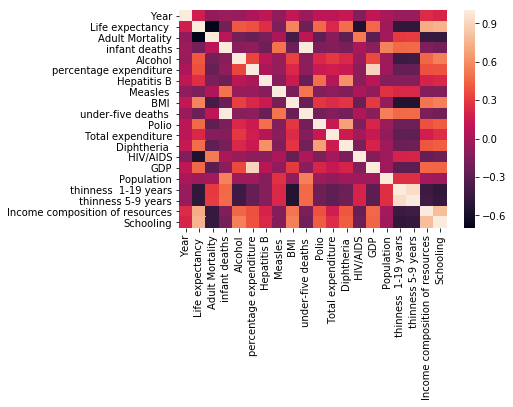

In [10]:
sns.heatmap(corr)

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


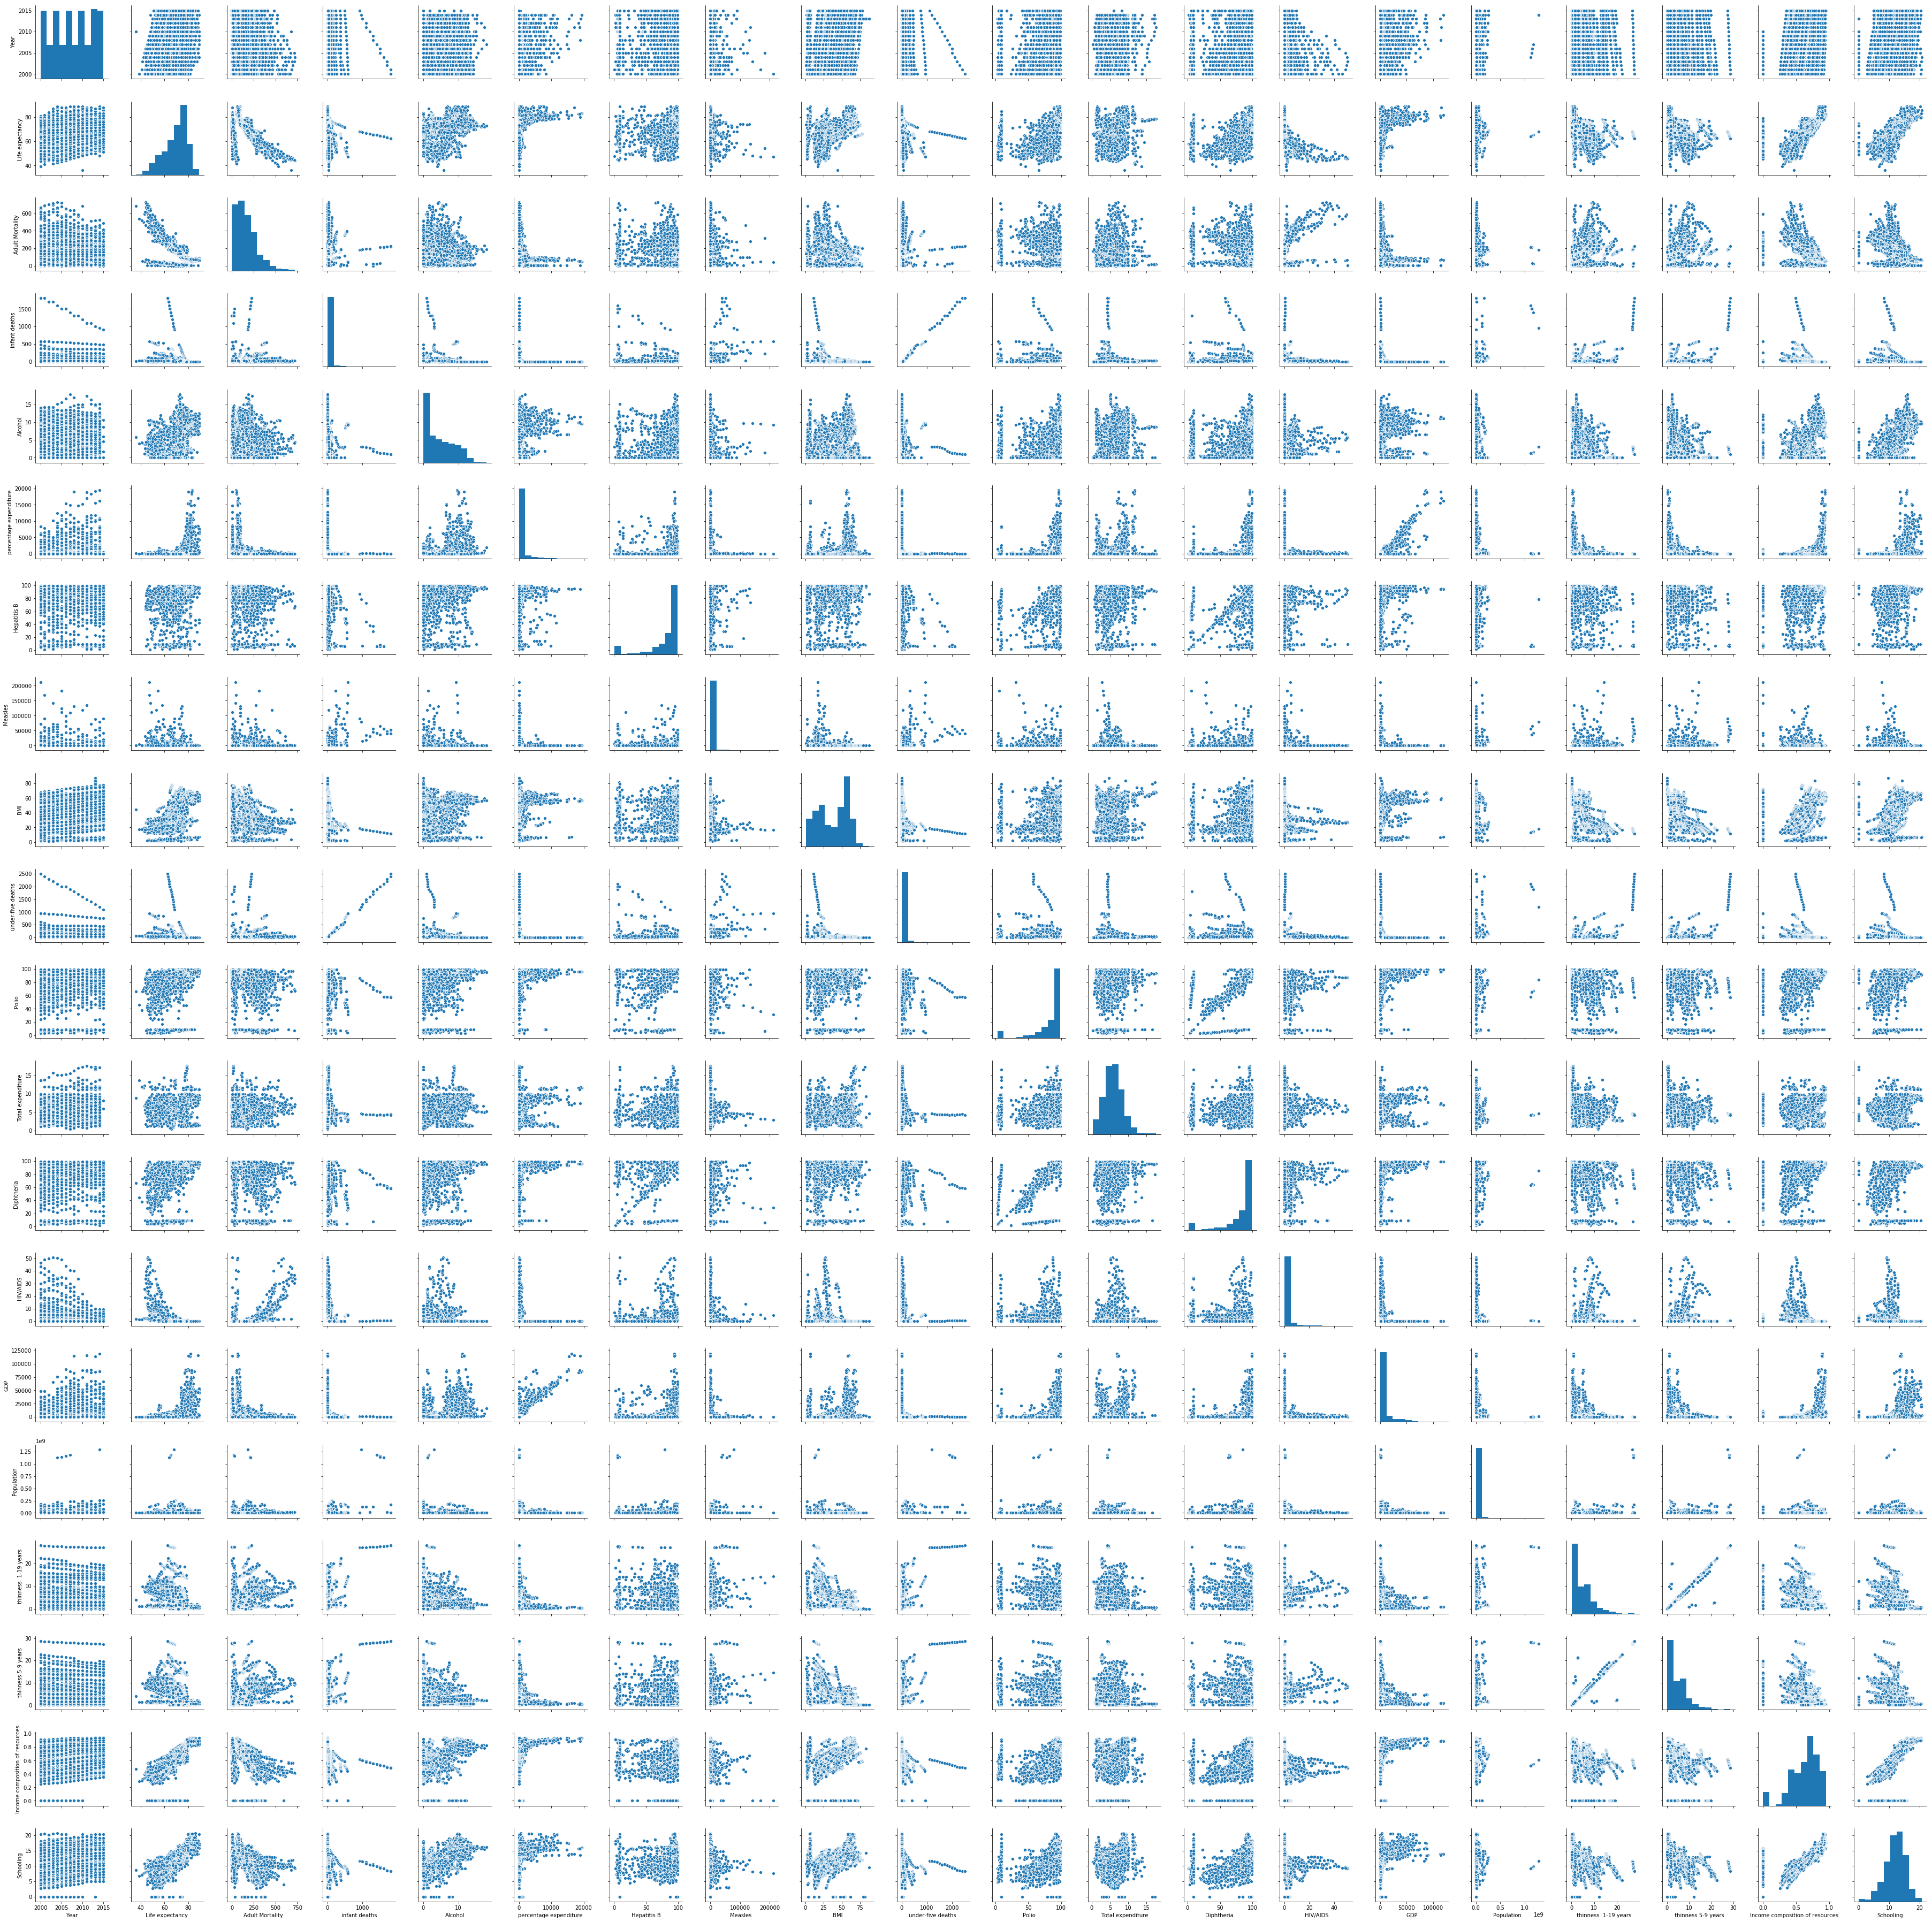

In [11]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

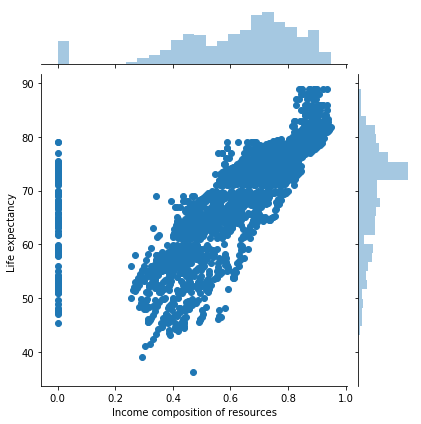

In [12]:
sns.jointplot(data=df, x='Income composition of resources', y='Life expectancy ')

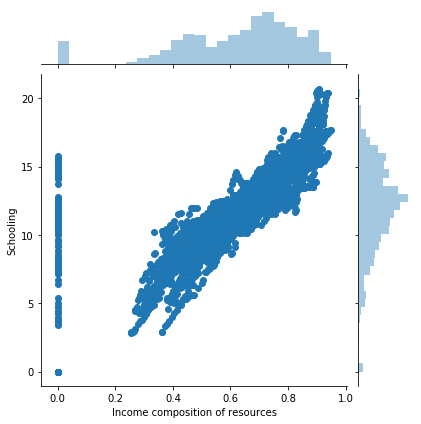

In [17]:
sns.jointplot(data=df, x='Income composition of resources', y='Schooling')

Text(0.5, 1.0, 'Life expectancy over the time')

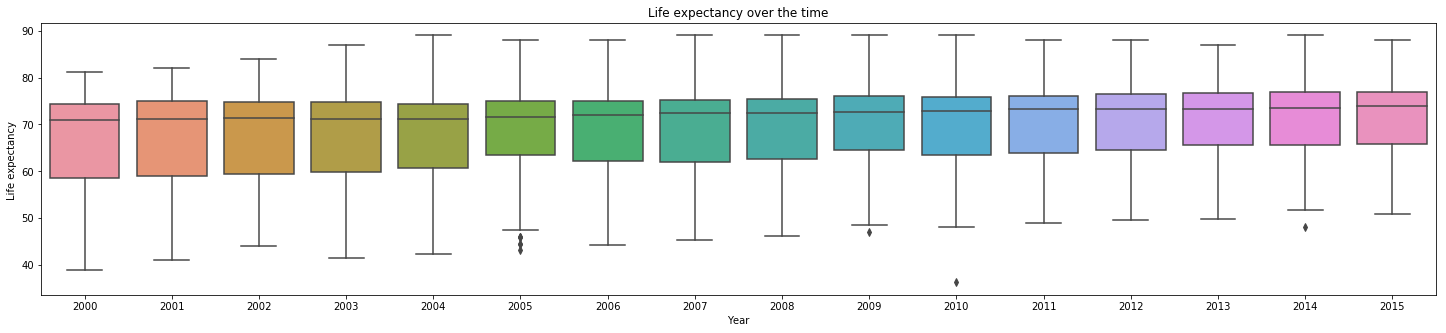

In [23]:
plt.figure(figsize=(25, 5))
sns.boxplot('Year', 'Life expectancy ', data=df)
plt.title('Life expectancy over the time')

Text(0.5, 1.0, 'Life expectancy in different countries')

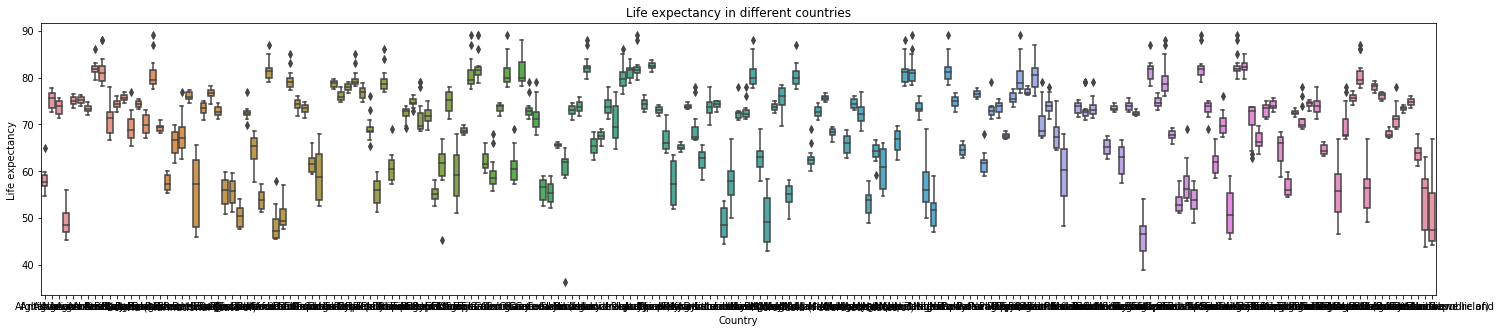

In [24]:
plt.figure(figsize=(25, 5))
sns.boxplot('Country', 'Life expectancy ', data=df)
plt.title('Life expectancy in different countries')

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


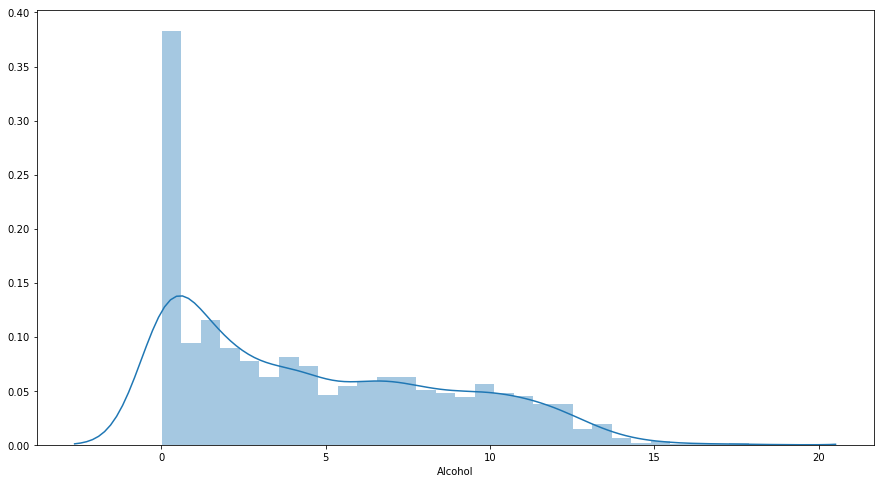

In [26]:
plt.figure(figsize=(15,8))
sns.distplot(df.Alcohol, bins =30)

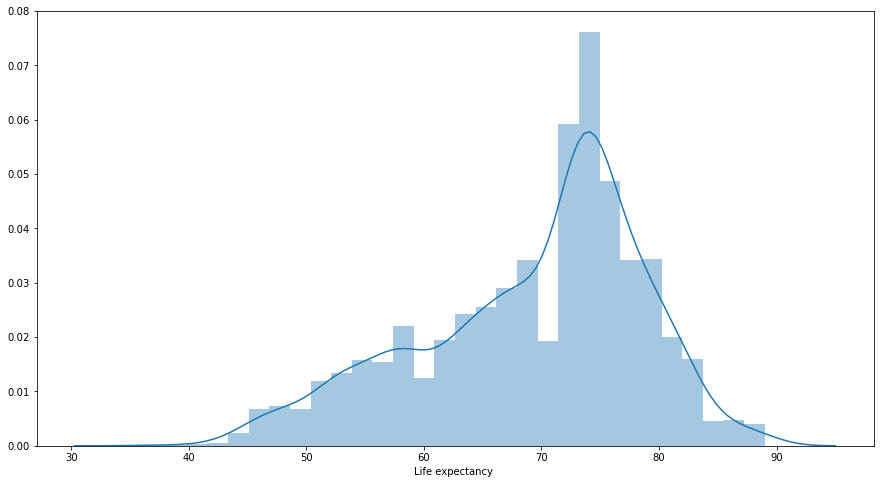

In [27]:
plt.figure(figsize=(15,8))
sns.distplot(df['Life expectancy '], bins =30)

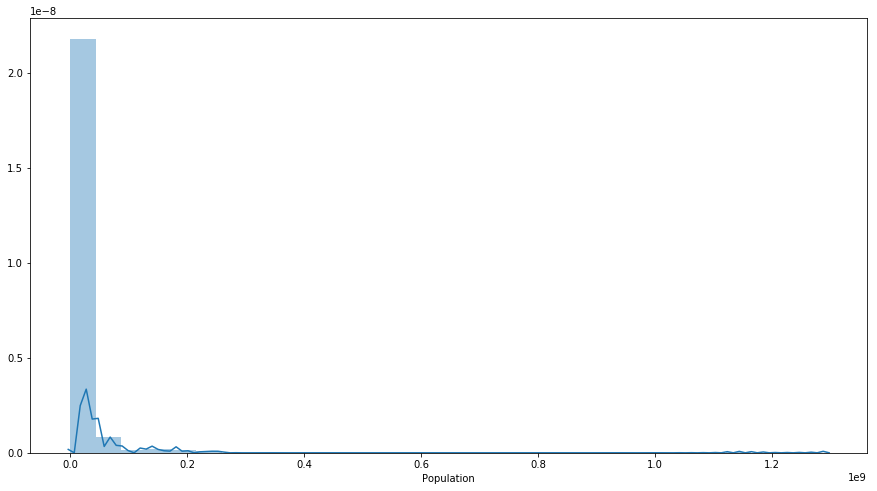

In [29]:
plt.figure(figsize=(15,8))
sns.distplot(df['Population'], bins =30)

In [36]:
# top 15 biggest by Population countries in 2015
cols = ['Country', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']
largest_population = df[df['Year'] == 2015].nlargest(15, ['Population'])[cols]
largest_population

Country  Life expectancy   Adult Mortality  infant deaths  \
1202    Indonesia              69.1            176.0            114   
1893      Nigeria              54.5            344.0            483   
994       Germany              81.0             68.0              2   
2681       Turkey              75.8             16.0             15   
576      Colombia              74.8            143.0             10   
1362        Kenya              63.4            249.0             54   
2425        Spain              82.8             56.0              1   
80      Argentina              76.3            116.0              8   
32        Algeria              75.6             19.0             21   
2039       Poland              77.5            117.0              2   
1234         Iraq              68.9            182.0             32   
0     Afghanistan              65.0            263.0             62   
2007         Peru              75.5            123.0              8   
1813        Nepal              69.2            165.0             17   
1010        Ghana              62.4            249.0             37   

      Hepatitis B  Measles    BMI   under-five deaths   Polio  Diphtheria   \
1202         78.0     15099   27.4                 136    8.0         78.0   
1893         49.0     12423   25.4                 747   49.0         49.0   
994          88.0      2464   62.3                   3   94.0         95.0   
2681         97.0       342   66.1                  18   97.0         97.0   
576          91.0         1   57.9                  12   91.0         91.0   
1362         89.0        95   22.0                  75   83.0         89.0   
2425         97.0       115   66.6                   1   97.0         97.0   
80           94.0         0   62.8                   9   93.0         94.0   
32           95.0        63   59.5                  24   95.0         95.0   
2039         96.0         0   61.7                   2   92.0         98.0   
1234         56.0      1433   59.1                  38   63.0         58.0   
0            65.0      1154   19.1                  83    6.0         65.0   
2007          9.0         4   55.6                  10   88.0          9.0   
1813         91.0      1599   19.1                  21    9.0         91.0   
1010         88.0        23   28.6                  52   88.0         88.0   

       HIV/AIDS           GDP   Population   thinness  1-19 years  \
1202        0.3   3336.166860  258162113.0                    1.4   
1893        3.7   2655.157977  181181744.0                    9.8   
994         0.1  41176.881580   81686611.0                    1.1   
2681        0.1   1979.525690   78271472.0                    4.9   
576         0.1    644.525556   48228697.0                    2.1   
1362        2.8   1349.971440   47236259.0                    7.8   
2425        0.1  25683.845650   46447697.0                    0.6   
80          0.1  13467.123600   43417765.0                    1.0   
32          0.1   4132.762920   39871528.0                    6.0   
2039        0.1  12565.987600   37986412.0                    1.9   
1234        0.1   4974.269300   36115649.0                    5.3   
0           0.1    584.259210   33736494.0                   17.2   
2007        0.1     63.343259   31376671.0                    1.1   
1813        0.1    743.765349   28656282.0                   15.7   
1010        0.7   1361.113950   27582821.0                    6.2   

       thinness 5-9 years  Income composition of resources  Schooling  
1202                  1.2                            0.686       12.9  
1893                  9.7                            0.525       10.0  
994                   1.1                            0.924       17.1  
2681                  4.8                            0.764       14.5  
576                   1.9                            0.724       13.6  
1362                  7.6                            0.550       11.1  
2425           

In [37]:
smallest_population = df[df['Year'] == 2015].nsmallest(15, ['Population'])[cols]
smallest_population

Country  Life expectancy   Adult Mortality  \
2441                 Sri Lanka              74.9            138.0   
1266                    Israel              82.5             58.0   
1378                  Kiribati              66.3            198.0   
2649       Trinidad and Tobago              71.2             17.0   
2633                     Tonga              73.5            133.0   
2842                   Vanuatu              72.0             13.0   
16                     Albania              77.8             74.0   
1522                 Lithuania              73.6            165.0   
1170                   Iceland              82.7             49.0   
978                    Georgia              74.4            129.0   
641                    Croatia              78.0             95.0   
512   Central African Republic              52.5            397.0   
1602                  Maldives              78.5             61.0   
2473                  Suriname              71.6            176.0   
1538                Luxembourg              82.0             63.0   

      infant deaths  Hepatitis B  Measles    BMI   under-five deaths   Polio  \
2441              3         99.0      1568   23.4                   3   99.0   
1266              0         96.0        80   64.9                   1   95.0   
1378              0         82.0         0   77.6                   0    8.0   
2649              0          9.0         0   47.1                   0   88.0   
2633              0         78.0         0   75.2                   0    8.0   
2842              0         64.0        39   53.3                   0   65.0   
16                0         99.0         0   58.0                   0   99.0   
1522              0         94.0        50   62.4                   0   93.0   
1170              0          NaN         0   61.0                   0   92.0   
978               1         94.0       431   56.2                   1   91.0   
641               0         94.0       206   63.7                   0   94.0   
512              15         47.0       150   22.7                  21   47.0   
1602              0         99.0         0   27.4                   0   99.0   
2473              0         89.0         0   58.3                   0   89.0   
1538              0         94.0         0   61.3                   0   99.0   

      Diphtheria    HIV/AIDS           GDP  Population   thinness  1-19 years  \
2441         99.0        0.1   3844.891230      2966.0                   15.1   
1266         95.0        0.1  35729.372530      8381.0                    1.2   
1378         78.0        0.1   1424.483611     11247.0                    0.1   
2649         96.0        0.3  17321.833730     13692.0                    5.7   
2633         78.0        0.1    493.775387     16364.0                    0.1   
2842         64.0        0.1    285.834140     26463.0                    1.5   
16           99.0        0.1   3954.227830     28873.0                    1.2   
1522         93.0        0.1  14252.428530     29491.0                    2.6   
1170         92.0        0.1   5734.443600     33815.0                    1.0   
978          94.0        0.1   3764.649120     37171.0                    2.7   
641          94.0        0.1  11579.667400     42364.0                    1.5   
512          47.0        4.4    348.381417     45461.0                    8.2   
1602         99.0        0.1   8395.785198     49163.0                   13.6   
2473         89.0        0.4   8818.982566     55328.0                    3.5   
1538         99.0        0.1   1199.822300     56964.0                    1.0   

       thinness 5-9 years  Income composition of resources  Schooling  
2441                 15.0                            0.764       14.0  
1266                  1.1                            0.898       16.0  
1378                  0.1                            0.586       11.9  
2649                  5.9                           

In [40]:
longest_life_expectancy = df[df['Year'] == 2015].nlargest(15, ['Life expectancy '])[cols]
longest_life_expectancy

Country  Life expectancy   Adult Mortality  infant deaths  \
2345           Slovenia              88.0             74.0              0   
737             Denmark              86.0             71.0              0   
544               Chile              85.0             82.0              2   
673              Cyprus              85.0             52.0              0   
1314              Japan              83.7             55.0              2   
2521        Switzerland              83.4             49.0              0   
2313          Singapore              83.1             55.0              0   
112           Australia              82.8             59.0              1   
2425              Spain              82.8             56.0              1   
1170            Iceland              82.7             49.0              0   
1282              Italy              82.7             56.0              1   
1266             Israel              82.5             58.0              0   
930              France              82.4             78.0              2   
2505             Sweden              82.4             53.0              0   
2087  Republic of Korea              82.3             64.0              1   

      Hepatitis B  Measles    BMI   under-five deaths   Polio  Diphtheria   \
2345          NaN        18    6.1                   0   95.0         95.0   
737           NaN         9   58.8                   0   93.0         93.0   
544          97.0         9   63.8                   2   96.0         96.0   
673          97.0         0    6.3                   0   97.0         97.0   
1314          NaN        35   29.0                   3   99.0         96.0   
2521          NaN        35   57.4                   0   97.0         97.0   
2313         96.0         0   33.2                   0   96.0         96.0   
112          93.0        74   66.6                   1   93.0         93.0   
2425         97.0       115   66.6                   1   97.0         97.0   
1170          NaN         0   61.0                   0   92.0         92.0   
1282         93.0       159   63.6                   2   93.0         93.0   
1266         96.0        80   64.9                   1   95.0         95.0   
930          86.0       157   62.5                   3   98.0         98.0   
2505         67.0        22   59.5                   0   98.0         98.0   
2087         98.0         7   31.7                   2   98.0         98.0   

       HIV/AIDS          GDP  Population   thinness  1-19 years  \
2345        0.1   2729.86383    263531.0                    1.4   
737         0.1   5314.64416   5683483.0                    1.1   
544         0.1  13653.22640  17762681.0                    0.8   
673         0.1   2375.11270    116985.0                    1.0   
1314        0.1  34474.13736    127141.0                    2.1   
2521        0.1   8989.84240   8282396.0                    0.4   
2313        0.1  53629.73746         NaN                    2.2   
112         0.1  56554.38760  23789338.0                    0.6   
2425        0.1  25683.84565  46447697.0                    0.6   
1170        0.1   5734.44360     33815.0                    1.0   
1282        0.1    349.14755    673582.0                    0.6   
1266        0.1  35729.37253      8381.0                    1.2   
930         0.1  36526.77110   6662468.0                    0.7   
2505        0.1   5585.25847   9799186.0                    1.5   
2087        0.1          NaN         NaN                    1.5   

       thinness 5-9 years  Income composition of resources  Schooling  
2345                  1.3                            0.888       17.3  
737                   0.9                            0.923       19.2  
544                   0.8                            0.845       16.3  
673                   1.0                            0.854       14.3  
1314                  1.8                            0.902       15.3  
2521                  0.3    

In [43]:
shortest_life_expectancy = df[df['Year'] == 2015].nsmallest(15, ['Life expectancy '])[cols]
shortest_life_expectancy

Country  Life expectancy   Adult Mortality  \
2297              Sierra Leone              51.0            413.0   
48                      Angola              52.4            335.0   
512   Central African Republic              52.5            397.0   
528                       Chad              53.1            356.0   
432              Côte d'Ivoire              53.3            397.0   
1474                   Lesotho              53.7            484.0   
1893                   Nigeria              54.5            344.0   
2377                   Somalia              55.0            312.0   
480                   Cameroon              57.3            357.0   
2409               South Sudan              57.3            332.0   
1764                Mozambique              57.6            355.0   
834          Equatorial Guinea              58.2             32.0   
1618                      Mali              58.2            266.0   
1570                    Malawi              58.3            365.0   
1090             Guinea-Bissau              58.9            275.0   

      infant deaths  Hepatitis B  Measles    BMI   under-five deaths   Polio  \
2297             22         86.0       607   24.4                  30   86.0   
48               66         64.0       118   23.3                  98    7.0   
512              15         47.0       150   22.7                  21   47.0   
528              46         46.0       418   19.1                  77   52.0   
432              57         83.0        65   28.0                  79   81.0   
1474              4         93.0         0   32.6                   6    9.0   
1893            483         49.0     12423   25.4                 747   49.0   
2377             50         42.0      7497   24.3                  80   47.0   
480              45         84.0      1809   29.0                  68   83.0   
2409             26         31.0       878    NaN                  39   41.0   
1764             60          8.0        79   22.6                  81    8.0   
834               3         16.0      1250   24.5                   4   17.0   
1618             52         64.0       215   23.8                  84   66.0   
1570             26         88.0         0   19.6                  38   88.0   
1090              4         87.0       153   26.3                   6   87.0   

      Diphtheria    HIV/AIDS          GDP   Population   thinness  1-19 years  \
2297         86.0        0.5   587.538233     723725.0                    7.4   
48           64.0        1.9  3695.793748    2785935.0                    8.3   
512          47.0        4.4   348.381417      45461.0                    8.2   
528          46.0        2.8   777.248751     149413.0                    8.5   
432          83.0        1.9          NaN          NaN                    5.5   
1474         93.0        9.3   173.828930    2174645.0                    5.5   
1893         49.0        3.7  2655.157977  181181744.0                    9.8   
2377         42.0        0.7   426.985370          NaN                    6.6   
480          84.0        3.5  1244.429421   22834522.0                    5.6   
2409         31.0        3.4   758.725782   11882136.0                    NaN   
1764          8.0        3.9   528.312560     281691.0                    3.6   
834          16.0        4.2  1347.312570    1175389.0                    8.4   
1618         64.0        1.5   729.725338    1746795.0                    7.7   
1570         88.0        4.8   362.657544    1757367.0                    6.4   
1090         87.0        3.2   596.871719     177526.0                    7.1   

       thinness 5-9 years  Income composition of resources  Schooling  
2297                  7.3                            0.431        9.5  
48                    8.2                            0.531       11.4  
512                   8.2                            0.347        7.1  
528                   8.4                           

In [44]:
shortest_life_expectancy = df.nsmallest(15, ['Life expectancy '])
shortest_life_expectancy

Country  Year      Status  Life expectancy   Adult Mortality  \
1127         Haiti  2010  Developing              36.3            682.0   
2312  Sierra Leone  2000  Developing              39.0            533.0   
2311  Sierra Leone  2001  Developing              41.0            519.0   
2309  Sierra Leone  2003  Developing              41.5             57.0   
2308  Sierra Leone  2004  Developing              42.3            496.0   
1585        Malawi  2000  Developing              43.1            588.0   
2307  Sierra Leone  2005  Developing              43.3             48.0   
1584        Malawi  2001  Developing              43.5            599.0   
2921        Zambia  2000  Developing              43.8            614.0   
1583        Malawi  2002  Developing              44.0             67.0   
2306  Sierra Leone  2006  Developing              44.3            464.0   
2933      Zimbabwe  2004  Developing              44.3            723.0   
1484       Lesotho  2005  Developing              44.5            675.0   
2934      Zimbabwe  2003  Developing              44.5            715.0   
1582        Malawi  2003  Developing              44.6            613.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
1127             23     5.76               36.292918          NaN         0   
2312             29     3.97               20.395683          NaN      3575   
2311             30     4.21               33.346915          NaN       649   
2309             30     4.07               38.614732          NaN       586   
2308             30     3.99               38.524548          NaN         7   
1585             51     1.18               13.762702          NaN       304   
2307             30     3.83               42.088929          NaN        29   
1584             48     1.15               12.797606          NaN       150   
2921             44     2.62               45.616880          NaN     30930   
1583             46     1.10                3.885395         64.0        92   
2306             30     3.80               38.000758          NaN        33   
2933             27     4.36                0.000000         68.0        31   
1484              5     2.67               57.903698         87.0         0   
2934             26     4.06                0.000000          7.0       998   
1582             43     1.08                4.375316         84.0       167   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
1127  ...   66.0               8.90         66.0        1.9  662.279518   
2312  ...   46.0              13.63         44.0        1.2  139.314773   
2311  ...   38.0              11.83         38.0        1.5  227.779471   
2309  ...   66.0              11.69         73.0        1.9  263.761831   
2308  ...   69.0              11.66         65.0        2.1  263.145817   
1585  ...   73.0               6.70         75.0       25.5  153.259487   
2307  ...   67.0              12.25         65.0        2.2  287.689194   
1584  ...   86.0               5.70          9.0       25.1  146.761540   
2921  ...   85.0               7.16         85.0       18.7  341.955625   
1583  ...   79.0               4.82         64.0       24.7   29.979898   
2306  ...   65.0               1.68         64.0        2.2  322.313468   
2933  ...   67.0               7.13         65.0       33.6  454.366654   
1484  ...   88.0               6.30         89.0       34.8  862.946312   
2934  ...    7.0               6.52         68.0       36.7  453.351155   
1582  ...   85.0               6.35         84.0       24.2   26.152517   

      Population   thinness  1-19 years   thinness 5-9 years  \
1127   9999617.0                    4.0                  4.0   
2312   4564297.0                    1.3                  1.4   
2311   4739147.0                    1.1                  1.2   
2309   5199549.0                    9.7                  9.8   
2308   5439695.0        

### Manage missing values

Total   Percent
Population                         652  0.221920
Hepatitis B                        553  0.188223
GDP                                448  0.152485
Total expenditure                  226  0.076923
Alcohol                            194  0.066031
Income composition of resources    167  0.056841
Schooling                          163  0.055480
 BMI                                34  0.011572
 thinness  1-19 years               34  0.011572
 thinness 5-9 years                 34  0.011572
Diphtheria                          19  0.006467
Polio                               19  0.006467
Adult Mortality                     10  0.003404
Life expectancy                     10  0.003404

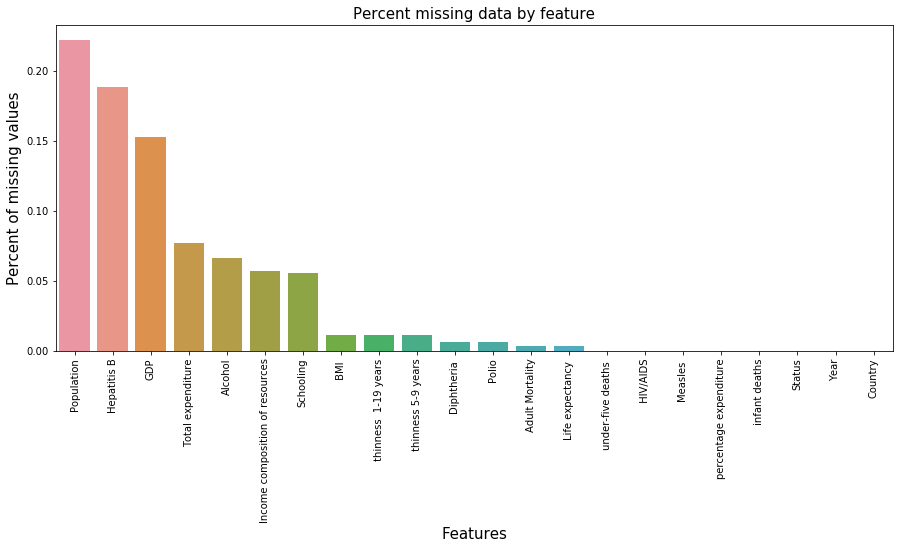

In [13]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data[missing_data['Total'] != 0]

In [14]:
missing_cols = list((missing_data[missing_data['Total'] != 0]).T.columns)
missing_cols

['Population',
 'Hepatitis B',
 'GDP',
 'Total expenditure',
 'Alcohol',
 'Income composition of resources',
 'Schooling',
 ' BMI ',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Diphtheria ',
 'Polio',
 'Adult Mortality',
 'Life expectancy ']

In [15]:
for i in missing_cols:
    df[f'{i}_na'] = df[i].isna()

In [16]:
df.head().T

0            1            2  \
Country                             Afghanistan  Afghanistan  Afghanistan   
Year                                       2015         2014         2013   
Status                               Developing   Developing   Developing   
Life expectancy                              65         59.9         59.9   
Adult Mortality                             263          271          268   
infant deaths                                62           64           66   
Alcohol                                    0.01         0.01         0.01   
percentage expenditure                  71.2796      73.5236      73.2192   
Hepatitis B                                  65           62           64   
Measles                                    1154          492          430   
 BMI                                       19.1         18.6         18.1   
under-five deaths                            83           86           89   
Polio                                         6           58           62   
Total expenditure                          8.16         8.18         8.13   
Diphtheria                                   65           62           64   
 HIV/AIDS                                   0.1          0.1          0.1   
GDP                                     584.259      612.697      631.745   
Population                          3.37365e+07       327582  3.17317e+07   
 thinness  1-19 years                      17.2         17.5         17.7   
 thinness 5-9 years                        17.3         17.5         17.7   
Income composition of resources           0.479        0.476         0.47   
Schooling                                  10.1           10          9.9   
Population_na                             False        False        False   
Hepatitis B_na                            False        False        False   
GDP_na                                    False        False        False   
Total expenditure_na                      False        False        False   
Alcohol_na                                False        False        False   
Income composition of resources_na        False        False        False   
Schooling_na                              False        False        False   
 BMI _na                                  False        False        False   
 thinness  1-19 years_na                  False        False        False   
 thinness 5-9 years_na                    False        False        False   
Diphtheria _na                            False        False        False   
Polio_na                                  False        False        False   
Adult Mortality_na                        False        False        False   
Life expectancy _na                       False        False        False   

                                              3            4  
Country                             Afghanistan  Afghanistan  
Year                                       2012         2011  
Status                               Developing   Developing  
Life expectancy                            59.5         59.2  
Adult Mortality                             272          275  
infant deaths                                69           71  
Alcohol                                    0.01         0.01  
percentage expenditure                  78.1842      7.09711  
Hepatitis B                                  67           68  
Measles                                    2787         3013  
 BMI                                       17.6         17.2  
under-five deaths                            93           97  
Polio                                        67           68  
Total expenditure                          8.52         7.87  
Diphtheria                                   67           68  
 HIV/AIDS                                   0.1          0.1  
GDP                                     669.959      63.5372  
Population                          3.69696e+06   2.9786e+06  

In [420]:
df[df['Life expectancy '].isnull()]

Country  Year      Status  Life expectancy   \
624            Cook Islands  2013  Developing               NaN   
769                Dominica  2013  Developing               NaN   
1650       Marshall Islands  2013  Developing               NaN   
1715                 Monaco  2013  Developing               NaN   
1812                  Nauru  2013  Developing               NaN   
1909                   Niue  2013  Developing               NaN   
1958                  Palau  2013  Developing               NaN   
2167  Saint Kitts and Nevis  2013  Developing               NaN   
2216             San Marino  2013  Developing               NaN   
2713                 Tuvalu  2013  Developing               NaN   

      Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
624               NaN              0     0.01                0.000000   
769               NaN              0     0.01               11.419555   
1650              NaN              0     0.01              871.878317   
1715              NaN              0     0.01                0.000000   
1812              NaN              0     0.01               15.606596   
1909              NaN              0     0.01                0.000000   
1958              NaN              0      NaN              344.690631   
2167              NaN              0     8.54                0.000000   
2216              NaN              0     0.01                0.000000   
2713              NaN              0     0.01               78.281203   

      Hepatitis B  Measles   ...  Alcohol_na  \
624          98.0         0  ...       False   
769          96.0         0  ...       False   
1650          8.0         0  ...       False   
1715         99.0         0  ...       False   
1812         87.0         0  ...       False   
1909         99.0         0  ...       False   
1958         99.0         0  ...        True   
2167         97.0         0  ...       False   
2216         69.0         0  ...       False   
2713          9.0         0  ...       False   

      Income composition of resources_na  Schooling_na   BMI _na  \
624                                 True          True     False   
769                                False         False     False   
1650                                True         False     False   
1715                                True          True      True   
1812                                True         False     False   
1909                                True          True     False   
1958                               False         False     False   
2167                               False         False     False   
2216                                True         False      True   
2713                                True         False     False   

       thinness  1-19 years_na   thinness 5-9 years_na  Diphtheria _na  \
624                      False                   False           False   
769                      False                   False           False   
1650                     False                   False           False   
1715                      True                    True           False   
1812                     False                   False           False   
1909                     False                   False           False   
1958                     False                   False           False   
2167                     False                   False           False   
2216                      True                    True           False   
2713                     False                   False           False   

      Polio_na  Adult Mortality_na  Life expectancy _na  
624      False                True                 True  
769      False                True                 True  
1650     False                True                 True  
1715     False                True                 True  
1812     False                True                 True  
1909     False                True   

In [17]:
# Sort values by Country and Year for more accurate fillna
df = df.sort_values(by=['Country', 'Year'], ascending=True)
df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
15  Afghanistan  2000  Developing              54.8            321.0   
14  Afghanistan  2001  Developing              55.3            316.0   
13  Afghanistan  2002  Developing              56.2              3.0   
12  Afghanistan  2003  Developing              56.7            295.0   
11  Afghanistan  2004  Developing              57.0            293.0   

    infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
15             88     0.01               10.424960         62.0      6532   
14             88     0.01               10.574728         63.0      8762   
13             88     0.01               16.887351         64.0      2486   
12             87     0.01               11.089053         65.0       798   
11             87     0.02               15.296066         67.0       466   

    ...  Alcohol_na  Income composition of resources_na  Schooling_na  \
15  ...       False                               False         False   
14  ...       False                               False         False   
13  ...       False                               False         False   
12  ...       False                               False         False   
11  ...       False                               False         False   

     BMI _na   thinness  1-19 years_na   thinness 5-9 years_na  \
15     False                     False                   False   
14     False                     False                   False   
13     False                     False                   False   
12     False                     False                   False   
11     False                     False                   False   

    Diphtheria _na  Polio_na  Adult Mortality_na  Life expectancy _na  
15           False     False               False                False  
14           False     False               False                False  
13           False     False               False                False  
12           False     False               False                False  
11           False     False               False                False  

[5 rows x 36 columns]

In [18]:
# use forward-fill to propagate previous values
df.fillna(method='ffill',inplace=True)

In [19]:
# Check NaN values
df.isnull().values.sum()

0

### Encode categorical data

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
encoder = LabelEncoder()
df['Country'] = encoder.fit_transform(df['Country'])
df['Status'] = encoder.fit_transform(df['Status'])

In [22]:
df.head()

Country  Year  Status  Life expectancy   Adult Mortality  infant deaths  \
15        0  2000       1              54.8            321.0             88   
14        0  2001       1              55.3            316.0             88   
13        0  2002       1              56.2              3.0             88   
12        0  2003       1              56.7            295.0             87   
11        0  2004       1              57.0            293.0             87   

    Alcohol  percentage expenditure  Hepatitis B  Measles   ...  Alcohol_na  \
15     0.01               10.424960         62.0      6532  ...       False   
14     0.01               10.574728         63.0      8762  ...       False   
13     0.01               16.887351         64.0      2486  ...       False   
12     0.01               11.089053         65.0       798  ...       False   
11     0.02               15.296066         67.0       466  ...       False   

    Income composition of resources_na  Schooling_na   BMI _na  \
15                               False         False     False   
14                               False         False     False   
13                               False         False     False   
12                               False         False     False   
11                               False         False     False   

     thinness  1-19 years_na   thinness 5-9 years_na  Diphtheria _na  \
15                     False                   False           False   
14                     False                   False           False   
13                     False                   False           False   
12                     False                   False           False   
11                     False                   False           False   

    Polio_na  Adult Mortality_na  Life expectancy _na  
15     False               False                False  
14     False               False                False  
13     False               False                False  
12     False               False                False  
11     False               False                False  

[5 rows x 36 columns]

### Split the data

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
df_to_split = df.drop(['Life expectancy _na'], axis=1)

In [25]:
df_to_split.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Population_na',
       'Hepatitis B_na', 'GDP_na', 'Total expenditure_na', 'Alcohol_na',
       'Income composition of resources_na', 'Schooling_na', ' BMI _na',
       ' thinness  1-19 years_na', ' thinness 5-9 years_na', 'Diphtheria _na',
       'Polio_na', 'Adult Mortality_na'],
      dtype='object')

In [26]:
final_train_data, test_data, final_train_labels, test_labels = train_test_split(
    df_to_split.drop('Life expectancy ', axis=1), df_to_split['Life expectancy '],
    test_size=0.2, random_state=RANDOM_STATE)

In [27]:
train_data, validation_data, train_labels, validation_labels = train_test_split(
    final_train_data, final_train_labels,
    test_size=0.2, random_state=RANDOM_STATE)

In [28]:
[x.shape for x in (final_train_data, test_data, final_train_labels, test_labels)]

[(2350, 34), (588, 34), (2350,), (588,)]

In [29]:
[x.shape for x in (train_data, validation_data, train_labels, validation_labels)]

[(1880, 34), (470, 34), (1880,), (470,)]

### Check best parameters and create a model

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
from pprint import pprint

In [32]:
# Random Search with Cross Validation

In [33]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [34]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state=RANDOM_STATE)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=RANDOM_STATE, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(validation_data, validation_labels);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.8min finished
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [35]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [ ]:
# rf_random.cv_results_

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [37]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('Mean absolute error: {:0.4f}'.format(mean_absolute_error(test_labels, predictions)))
    print('Mean squared error:  {:0.4f}'.format(mean_squared_error(test_labels, predictions)))
    
    return accuracy

In [38]:
base_model = RandomForestRegressor(n_estimators=10, random_state=RANDOM_STATE)
base_model.fit(validation_data, validation_labels)
base_accuracy = evaluate(base_model, validation_data, validation_labels)

Model Performance
Average Error: 0.8214 degrees.
Accuracy = 98.75%.
Mean absolute error: 0.8214
Mean squared error:  1.5177


In [39]:
# Evaluate the Best Random Search Model
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, validation_data, validation_labels)

Model Performance
Average Error: 0.6507 degrees.
Accuracy = 99.00%.
Mean absolute error: 0.6507
Mean squared error:  0.9244


In [40]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.26%.


In [264]:
# Grid Search CV

In [41]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [90, 100, 110, 120],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 4, 6],
    'n_estimators': [800, 1000, 1200, 1400]
}

# Create a base model
rf = RandomForestRegressor(random_state=RANDOM_STATE)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                          cv=3, n_jobs=-1, verbose=2, return_train_score=True)

In [42]:
# Fit the grid search to the data
grid_search.fit(train_data, train_labels);

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   49.4s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.2min
/opt/conda/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 12.7min
/opt/conda/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 17.1min finished


In [43]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1400}

In [45]:
# Evaluate the Best Model from Grid Search
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, validation_data, validation_labels)

Model Performance
Average Error: 1.4258 degrees.
Accuracy = 97.74%.
Mean absolute error: 1.4258
Mean squared error:  4.7551


In [46]:
print('Improvement of {:0.2f}%.'.format(100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of -1.02%.


In [47]:
# Final Best Model
final_model = best_random

print('Final Model Parameters:\n')
pprint(final_model.get_params())

Final Model Parameters:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 100,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 800,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [48]:
final_model.fit(final_train_data, final_train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [49]:
final_accuracy = evaluate(final_model, test_data, test_labels)

Model Performance
Average Error: 1.1094 degrees.
Accuracy = 98.36%.
Mean absolute error: 1.1094
Mean squared error:  3.3939


In [50]:
# Check Feature importancy

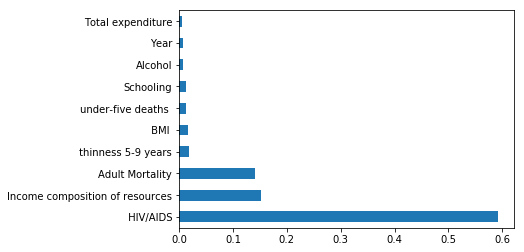

In [51]:
(pd.Series(final_model.feature_importances_, index=test_data.columns)
    .nlargest(10)
    .plot(kind='barh'))

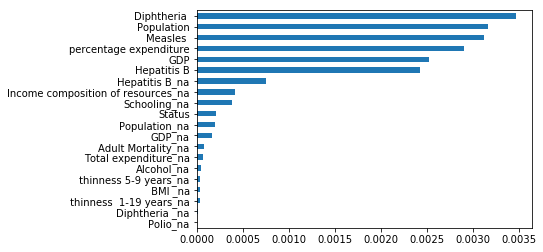

In [52]:
(pd.Series(final_model.feature_importances_, index=test_data.columns)
    .nsmallest(20)
    .plot(kind='barh'))

### Visualizing One Tree in the Forest

In [376]:
# from sklearn.tree import export_graphviz

# visual_tree = final_model.estimators_[12]
# export_graphviz(visual_tree, out_file='best_tree.dot', feature_names=test_data.columns,
#                precision=2, filled=True, rounded=True, max_depth=None)

In [378]:
# import pydot

# (graph, ) = pydot.graph_from_dot_file('best_tree.dot')
# graph.write_png('best_tree.png')

### Check if accuracy changing if median of nan values will be used

In [53]:
df = pd.read_csv('./Life Expectancy Data.csv', low_memory=False)

In [54]:
for i in missing_cols:
    df[f'{i}_na'] = df[i].isna()

In [55]:
df.fillna(df.median(), inplace=True)

In [56]:
# Check NaN values
df.isnull().values.sum()

0

In [57]:
encoder = LabelEncoder()
df['Country'] = encoder.fit_transform(df['Country'])
df['Status'] = encoder.fit_transform(df['Status'])

In [58]:
df_to_split = df.drop(['Life expectancy _na'], axis=1)

In [63]:
median_na_train_data, median_na_test_data, median_na_final_train_labels, media_na_test_labels = train_test_split(
    df_to_split.drop('Life expectancy ', axis=1), df_to_split['Life expectancy '],
    test_size=0.2, random_state=RANDOM_STATE)

In [64]:
[x.shape for x in (median_na_train_data, median_na_test_data, median_na_final_train_labels, media_na_test_labels)]

[(2350, 34), (588, 34), (2350,), (588,)]

In [61]:
final_model.fit(median_na_train_data, median_na_final_train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [65]:
final_accuracy = evaluate(final_model, median_na_test_data, media_na_test_labels)

Model Performance
Average Error: 1.0541 degrees.
Accuracy = 98.42%.
Mean absolute error: 1.0541
Mean squared error:  2.6598
